In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

**1.Download the dataset: Dataset**

**2.IMAGE AUGMENTATION**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
x_train=train_datagen.flow_from_directory("/content/drive/MyDrive/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4408 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4408 images belonging to 5 classes.


**3,4.CREATE MODEL: Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)**

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense


In [ ]:
model=Sequential()


In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation='relu'))

In [ ]:
model.add(Dense(300,activation='relu'))

In [ ]:
model.add(Dense(5,activation="softmax"))

**5.COMPILE THE MODEL**

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [ ]:
len(x_train)

184

In [ ]:
len(x_test)

184

**6.FIT THE MODEL**

In [ ]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=5,validation_steps=5)

Epoch 1/5
5/5 [==============================] - 27s 7s/step - loss: 1.1851 - accuracy: 0.5000 - val_loss: 1.1608 - val_accuracy: 0.5333
Epoch 2/5
5/5 [==============================] - 24s 6s/step - loss: 1.2091 - accuracy: 0.4333 - val_loss: 1.1965 - val_accuracy: 0.4917
Epoch 3/5
5/5 [==============================] - 18s 4s/step - loss: 1.2700 - accuracy: 0.4750 - val_loss: 1.1902 - val_accuracy: 0.4583
Epoch 4/5
5/5 [==============================] - 22s 5s/step - loss: 1.0763 - accuracy: 0.5268 - val_loss: 1.2193 - val_accuracy: 0.4750
Epoch 5/5
5/5 [==============================] - 18s 4s/step - loss: 1.1030 - accuracy: 0.5083 - val_loss: 1.4695 - val_accuracy: 0.4083


**7.SAVE THE MODEL**

In [ ]:
model.save("flower1.h5")

**8.TEST THE MODEL**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [ ]:
model=load_model("flower1.h5")

In [ ]:
img=image.load_img("/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg",target_size=(64,64))

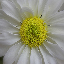

In [ ]:
img

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[141., 141., 139.],
        [149., 149., 149.],
        [152., 152., 154.],
        ...,
        [162., 161., 166.],
        [154., 154., 152.],
        [153., 153., 153.]],

       [[136., 135., 131.],
        [146., 145., 143.],
        [169., 168., 174.],
        ...,
        [159., 158., 163.],
        [155., 155., 153.],
        [149., 149., 149.]],

       [[125., 125., 117.],
        [138., 140., 137.],
        [152., 152., 152.],
        ...,
        [156., 156., 156.],
        [157., 157., 155.],
        [143., 142., 140.]],

       ...,

       [[ 41.,  44.,  23.],
        [ 43.,  46.,  25.],
        [ 49.,  51.,  37.],
        ...,
        [128., 124., 121.],
        [125., 121., 118.],
        [125., 122., 117.]],

       [[ 43.,  46.,  25.],
        [ 43.,  46.,  25.],
        [ 54.,  55.,  37.],
        ...,
        [130., 126., 125.],
        [129., 125., 124.],
        [127., 123., 122.]],

       [[ 44.,  47.,  26.],
        [ 45.,  48.,  27.],
        [ 53.,  

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x = np.expand_dims(x,axis=0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 111ms/step


In [ ]:
pred_prob

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
class_name=["daisy","dandelio","rose","sunflower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]

In [ ]:
pred_id

3

In [ ]:
print("predicted flower is ",str(class_name[pred_id]))

predicted flower is  sunflower
